In [1]:
import os, glob, yaml
from collections import ChainMap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


def get_metric_files(logs_root):
    version_roots = glob.glob(os.path.join(logs_root, '*'))
    version_data = []
    for version_root in version_roots:
        metric_file = os.path.join(version_root, 'metrics.csv')
        metadata_file = os.path.join(version_root, 'metadata.yaml')
        # checkpoint_file = os.path.join(version_root, glob.glob(os.path.join(version_root, 'checkpoints', '*'))[0])
        checkpoint_file = None
        if os.path.exists(metric_file):
            version_data.append((metric_file, metadata_file,  checkpoint_file))
    return version_data

def get_metadata(metadata_file):
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            raw = yaml.safe_load(f)
            metadata = dict(ChainMap(*raw.get('model', [])))
            for key in ('time', 'benchmark'):
                if key in metadata and isinstance(metadata[key], list):
                    metadata[key] = dict(ChainMap(*metadata[key]))
        return metadata
    else:
        return None

def get_metrics(metrics_file):
    if os.path.exists(metrics_file):
        return pd.read_csv(metrics_file)
    else:
        return None

# Stage 1
Wybór architektury segmentacyjnej.

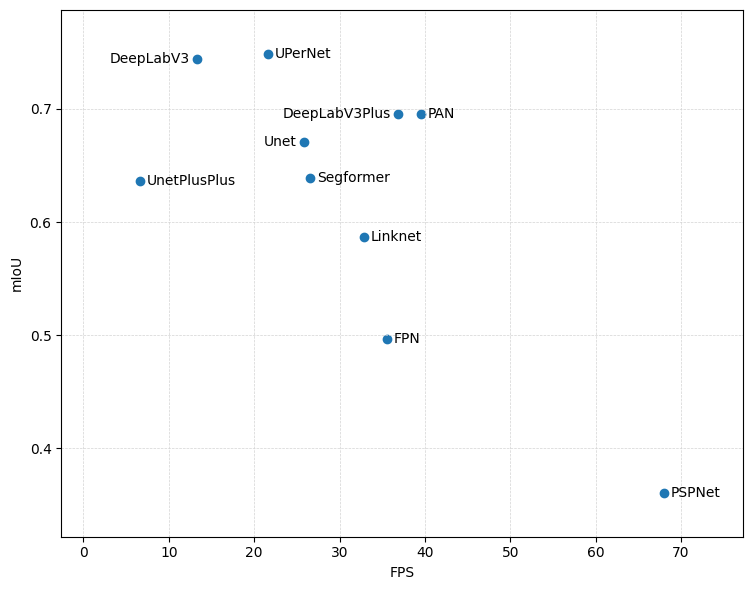

In [2]:
x_vals = []
y_vals = []
labels = []

root_dir = '.\\checkpoints\\modern\\stage1'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue

        if metadata['name'] == 'MAnet':
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('name', os.path.basename(arch_dir))
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals)

for x, y, lbl in zip(x_vals, y_vals, labels):
    # różne offsety zależnie od etykiety
    if lbl == 'Unet':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    elif lbl == 'DeepLabV3Plus':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    elif lbl == 'DeepLabV3':
        offset = (-5, -5)   # w lewo i w górę
        ha = 'right'
    else:
        offset = (5, -5)    # domyślne dla pozostałych
        ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom'
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()

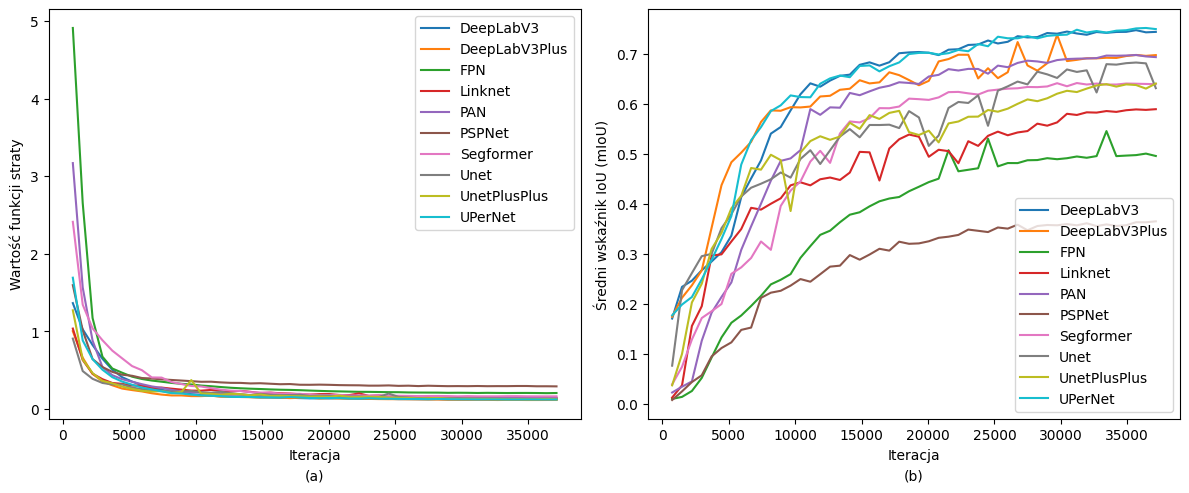

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Iteracja po architekturach i plikach metryk
for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        name = metadata.get('name', os.path.basename(arch_dir))

        if name == 'MAnet':
            continue

        # Rysowanie krzywych
        ax1.plot(metrics['step'], metrics['val_loss'], label=name)
        ax2.plot(metrics['step'], metrics['val_miou_dataset'], label=name)

# Konfiguracja wykresu strat (a)
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Wartość funkcji straty')
ax1.legend()
# Podpis (a) na dole
ax1.text(0.5, -0.15, '(a)', transform=ax1.transAxes, ha='center')

# Konfiguracja wykresu mIoU (b)
ax2.set_xlabel('Iteracja')
ax2.set_ylabel('Średni wskaźnik IoU (mIoU)')
ax2.legend()
# Podpis (b) na dole
ax2.text(0.5, -0.15, '(b)', transform=ax2.transAxes, ha='center')

fig.tight_layout()
plt.show()

## Stage 2

Wybór enkodera konwolucyjnego

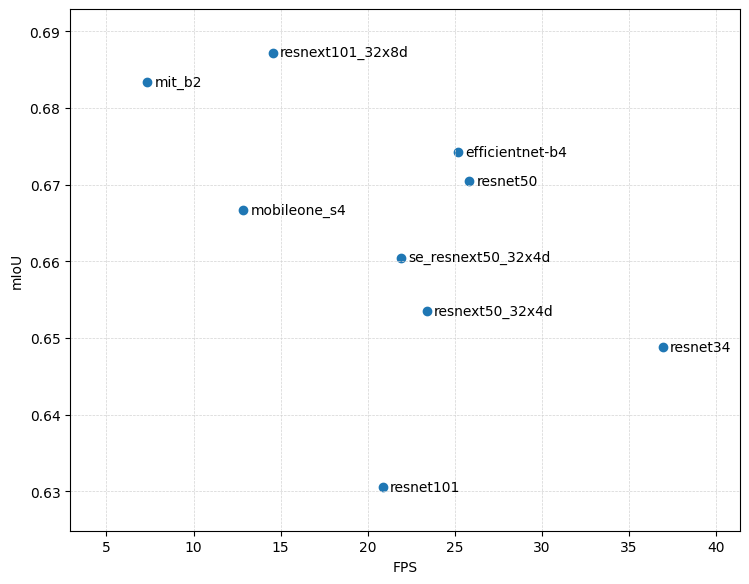

In [4]:
import matplotlib.pyplot as plt

x_vals = []
y_vals = []
labels = []

root_dir = '.\\checkpoints\\modern\\stage2'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', os.path.basename(arch_dir))
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals)

for x, y, lbl in zip(x_vals, y_vals, labels):
    offset = (5, -5)    # domyślne dla pozostałych
    ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom'
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()

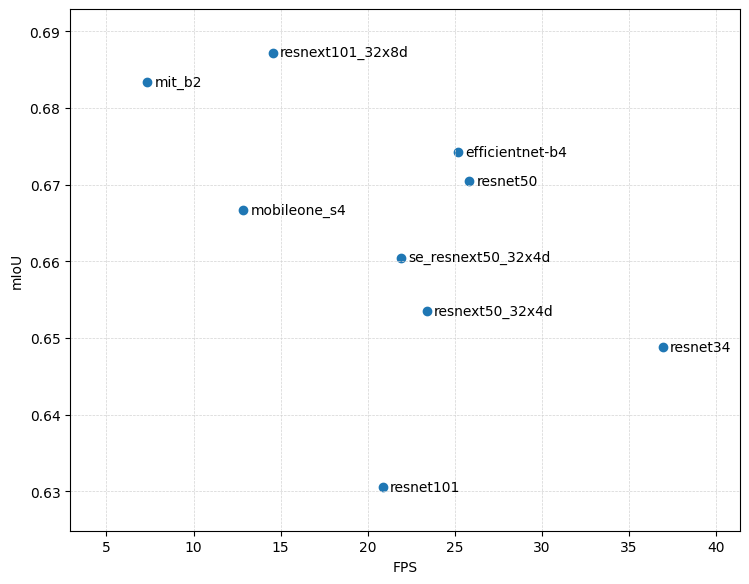

In [5]:
import matplotlib.pyplot as plt

x_vals = []
y_vals = []
labels = []

root_dir = '.\\checkpoints\\modern\\stage2'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', os.path.basename(arch_dir))
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals)

for x, y, lbl in zip(x_vals, y_vals, labels):
    offset = (5, -5)    # domyślne dla pozostałych
    ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom'
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()

## Stage 3

Wybór konfiguracji funkcji straty

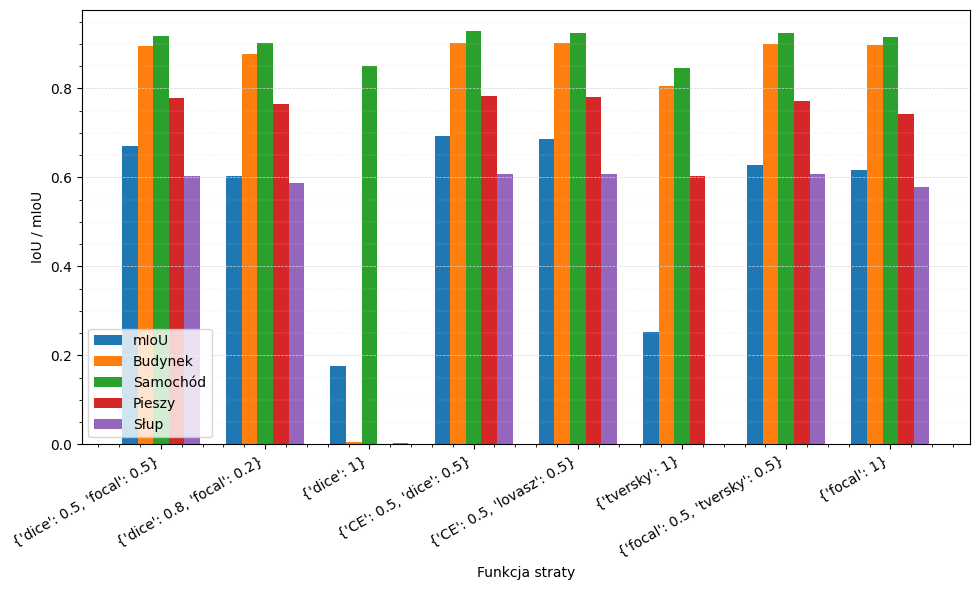

In [6]:
loss_names       = []
miou_vals        = []
building_iou     = []
car_iou          = []
pedestrian_iou   = []
pole_iou         = []

root_dir = '.\\checkpoints\\modern\\stage3'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])
        if metadata is None or 'val_miou_dataset' not in metrics.columns:
            continue

        # średnie z ostatnich 5 epok
        miou = metrics['val_miou_dataset'  ].tail(5).mean()
        bldg = metrics['iou_building'  ].tail(5).mean()
        car  = metrics['iou_car'].tail(5).mean()
        ped  = metrics['iou_person'].tail(5).mean()
        pole = metrics['iou_pole'      ].tail(5).mean()

        loss_fn = metadata.get('loss_fn', os.path.basename(arch_dir))

        loss_names     .append(loss_fn)
        miou_vals      .append(miou)
        building_iou   .append(bldg)
        car_iou        .append(car)
        pedestrian_iou .append(ped)
        pole_iou       .append(pole)

# --- rysowanie wykresu słupkowego ---
n  = len(loss_names)
ind = np.arange(n)
w  = 0.15  # szerokość jednego słupka

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(ind - 2*w, miou_vals,        w, label='mIoU')
ax.bar(ind -   w, building_iou,     w, label='Budynek')
ax.bar(ind,       car_iou,          w, label='Samochód')
ax.bar(ind +   w, pedestrian_iou,   w, label='Pieszy')
ax.bar(ind + 2*w, pole_iou,         w, label='Słup')

ax.set_xlabel('Funkcja straty')
ax.set_ylabel('IoU / mIoU')
ax.set_xticks(ind)
ax.set_xticklabels(loss_names, rotation=30, ha='right')

# siatka główna i pomocnicza na osi Y
ax.yaxis.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
ax.minorticks_on()
ax.yaxis.grid(which='minor', linestyle=':', linewidth=0.3, color='lightgray')

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

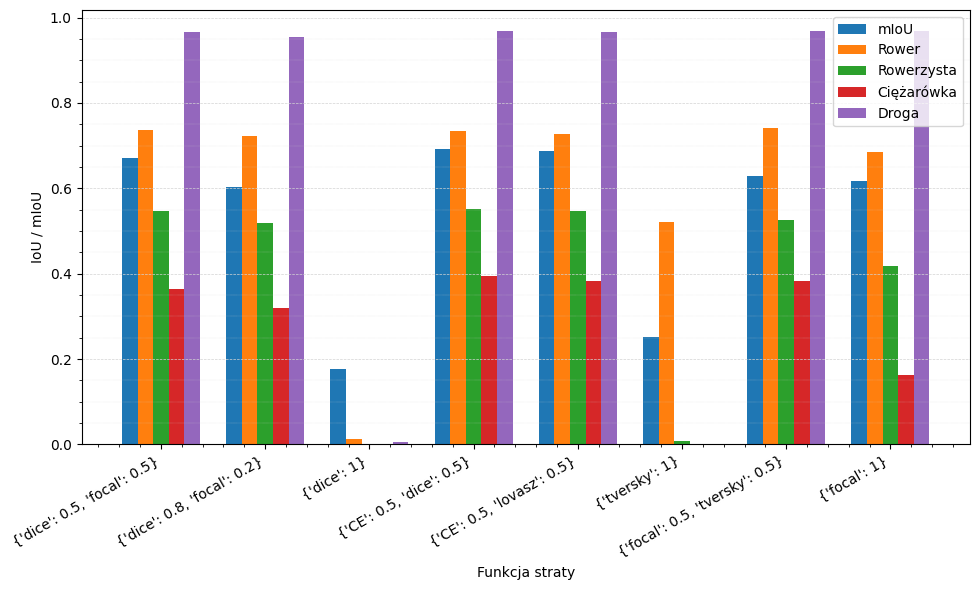

In [7]:
loss_names       = []
miou_vals        = []
building_iou     = []
car_iou          = []
pedestrian_iou   = []
pole_iou         = []

root_dir = '.\\checkpoints\\modern\\stage3'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])
        if metadata is None or 'val_miou_dataset' not in metrics.columns:
            continue

        # średnie z ostatnich 5 epok
        miou = metrics['val_miou_dataset'  ].tail(5).mean()
        bldg = metrics['iou_bicycle'  ].tail(5).mean()
        car  = metrics['iou_rider'].tail(5).mean()
        ped  = metrics['iou_truck'].tail(5).mean()
        pole = metrics['iou_road'      ].tail(5).mean()

        loss_fn = metadata.get('loss_fn', os.path.basename(arch_dir))

        loss_names     .append(loss_fn)
        miou_vals      .append(miou)
        building_iou   .append(bldg)
        car_iou        .append(car)
        pedestrian_iou .append(ped)
        pole_iou       .append(pole)

# --- rysowanie wykresu słupkowego ---
n  = len(loss_names)
ind = np.arange(n)
w  = 0.15  # szerokość jednego słupka

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(ind - 2*w, miou_vals,        w, label='mIoU')
ax.bar(ind -   w, building_iou,     w, label='Rower')
ax.bar(ind,       car_iou,          w, label='Rowerzysta')
ax.bar(ind +   w, pedestrian_iou,   w, label='Ciężarówka')
ax.bar(ind + 2*w, pole_iou,         w, label='Droga')

ax.set_xlabel('Funkcja straty')
ax.set_ylabel('IoU / mIoU')
ax.set_xticks(ind)
ax.set_xticklabels(loss_names, rotation=30, ha='right')

# siatka główna i pomocnicza na osi Y
ax.yaxis.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
ax.minorticks_on()
ax.yaxis.grid(which='minor', linestyle=':', linewidth=0.3, color='lightgray')

ax.legend()
plt.tight_layout()
plt.show()

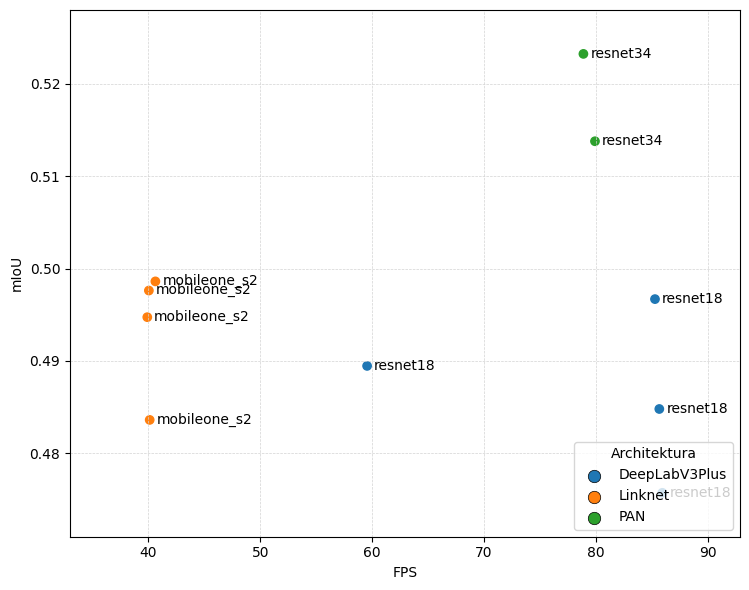

In [8]:
import matplotlib.pyplot as plt

x_vals = []
y_vals = []
labels = []
architectures = []

root_dir = '.\\logs'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue
        
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()
        
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue
        
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', 'os.path.basename(arch_dir)')
        
        x_vals.append(fps)
        y_vals.append(miou)
        labels.append(name)
        architectures.append(arch)

unique_archs = sorted(set(architectures))
cmap         = plt.get_cmap('tab10')  # paleta 10 kolorów
color_map    = {arch: cmap(i) for i, arch in enumerate(unique_archs)}
colors       = [color_map[arch] for arch in architectures]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, c=colors)

for x, y, lbl in zip(x_vals, y_vals, labels):

    # if lbl == 'efficientnet-b4':
    #     offset = (-5, -5)   # w lewo i w górę
    #     ha = 'right'
    # elif lbl == 'efficientnet-b2':
    #     offset = (-5, -5)   # w lewo i w górę
    #     ha = 'right'
    # else:
    offset = (5, -5)    # domyślne dla pozostałych
    ha = 'left'

    ax.annotate(
        lbl,               # tekst
        (x, y),            # punkt, do którego strzałka wskazuje
        xytext=offset,     # przesunięcie tekstu w punktach
        textcoords='offset points',
        ha=ha,             # wyrównanie poziome tekstu
        va='bottom'
    )

ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

for arch, col in color_map.items():
    ax.scatter([], [], c=[col], s=80, edgecolor='k', linewidth=0.5, label=arch)
ax.legend(title='Architektura', loc='lower right')

ax.set_xlabel('FPS')
ax.set_ylabel('mIoU')
plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()

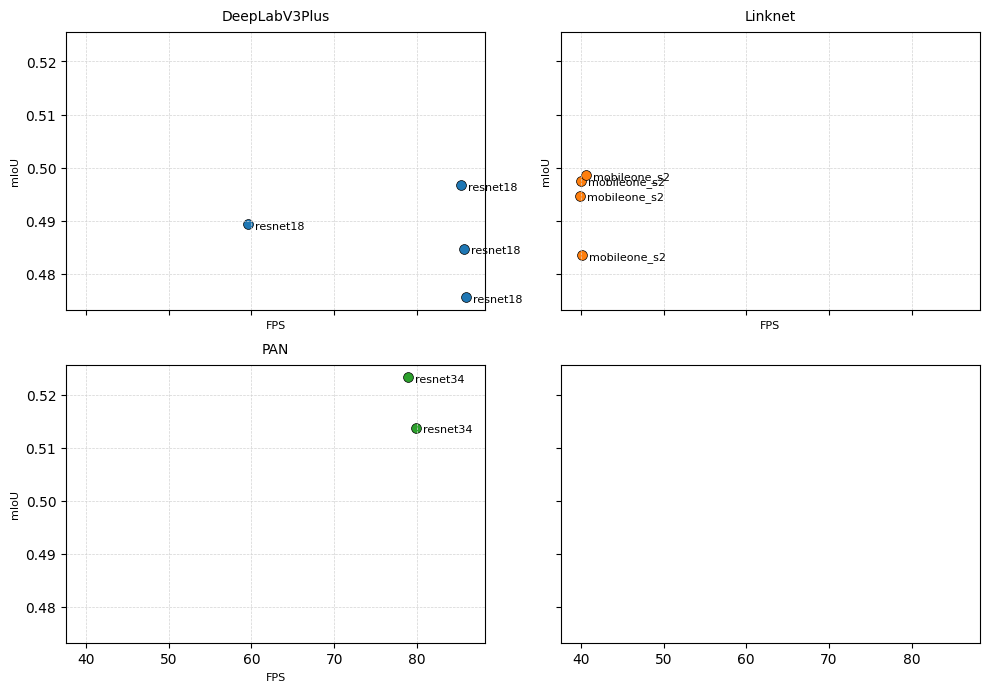

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# … tutaj Twój kod zbierający x_vals, y_vals, labels, architectures,
# unique_archs, color_map itp. (bez żadnych zmian) …

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
axes = axes.flatten()

for ax, arch in zip(axes, unique_archs):
    # filtracja danych dla tej architektury
    idxs = [i for i, a in enumerate(architectures) if a == arch]
    xs   = [x_vals[i] for i in idxs]
    ys   = [y_vals[i] for i in idxs]
    labs = [labels[i] for i in idxs]
    col  = color_map[arch]

    # mniejsze punkty
    ax.scatter(xs, ys, c=[col], s=50, edgecolor='k', linewidth=0.5)

    # adnotacje z mniejszą czcionką
    for x, y, lbl in zip(xs, ys, labs):
        ax.annotate(
            lbl,
            (x, y),
            xytext=(5, -5),
            textcoords='offset points',
            ha='left',
            va='bottom',
            fontsize=8
        )

    # tylko główna siatka
    ax.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')

    # podpisy osi pod każdym wykresem
    ax.set_xlabel('FPS', fontsize=8)
    ax.set_ylabel('mIoU', fontsize=8)

    # nazwa architektury pod wykresem
    ax.text(
        0.5, 1.08, arch,
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=10
    )

plt.tight_layout()
plt.margins(0.15, 0.1)
plt.show()


In [10]:
import pandas as pd
import glob
import os

# Listy na dane
model_names   = []
encoder_names = []
miou_vals     = []
fps_vals      = []

# BEZ ZMIAN: wczytywanie plików i metryk
root_dir  = '.\\logs'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])

        if metadata is None:
            continue

        if metrics is None:
            continue

        # BEZ ZMIAN: wyciąganie encoder i nazwy modelu
        name = metadata.get('encoder', 'unknown')
        arch = metadata.get('name', os.path.basename(arch_dir))

        # BEZ ZMIAN: wyciąganie FPS
        fps = metadata.get('benchmark', {}).get('fps', None)
        if fps is None:
            continue

        # BEZ ZMIAN: wyciąganie mIoU
        if 'val_miou_dataset' not in metrics.columns:
            continue
        miou = metrics['val_miou_dataset'].tail(5).mean()

        # Dodajemy do list
        model_names.append(arch)
        encoder_names.append(name)
        miou_vals.append(miou)
        fps_vals.append(fps)

# Tworzymy DataFrame
df = pd.DataFrame({
    'model_name': model_names,
    'encoder': encoder_names,
    'miou': miou_vals,
    'fps': fps_vals
})

df


,model_name,encoder,miou,fps
0,DeepLabV3Plus,resnet18,0.496695,85.262961
1,DeepLabV3Plus,resnet18,0.484802,85.649633
2,DeepLabV3Plus,resnet18,0.489464,59.548265
3,DeepLabV3Plus,resnet18,0.475727,85.921205
4,Linknet,mobileone_s2,0.483620,40.128551
5,Linknet,mobileone_s2,0.497622,40.055546
6,Linknet,mobileone_s2,0.494739,39.914102
7,Linknet,mobileone_s2,0.498612,40.637622
8,PAN,resnet34,0.523234,78.869719
9,PAN,resnet34,0.513779,79.903549


In [ ]:
root_dir  = '.\\checkpoints\\modern\\stage1'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

# Iteracja po architekturach i plikach metryk
for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics = get_metrics(file[0])
        metadata = get_metadata(file[1])

        name = metadata.get('name', os.path.basename(arch_dir))

        if name == 'MAnet':
            continue

        # Rysowanie krzywych
        ax1.plot(metrics['step'], metrics['lr'], label=name)

# Konfiguracja wykresu strat (a)
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Wartość learning rate')
ax1.legend()
# Podpis (a) na dole

fig.tight_layout()
plt.show()

In [ ]:
import math

def normalize(df, column):
    """Normalizuje wartości w kolumnie DataFrame do zakresu [0, 1]."""
    min_val = df[column].min()
    max_val = df[column].max()
    return (df[column] - min_val) / (max_val - min_val)

def harmonic_mean(df, beta, column1, column2):
    """Oblicza średnią harmoniczną wartości w kolumnie DataFrame."""
    return (1 + math.pow(beta, 2)) * normalize(df, column1) * normalize(df, column2) / math.pow(beta, 2) * (normalize(df, column1) + normalize(df, column2))

In [ ]:
df['score'] = harmonic_mean(df, 4, 'miou', 'fps')
df

,model_name,encoder,miou,fps,score
0,DeepLabV3Plus,resnet18,0.707305,87.978608,0.685455
1,DeepLabV3Plus,resnet34,0.733095,66.003700,0.605282
2,DeepLabV3Plus,resnet50,0.742773,36.812250,0.248009
3,DeepLabV3Plus,resnet101,0.755537,28.404466,0.177664
4,DeepLabV3Plus,efficientnet-b2,0.734827,44.393855,0.311350
5,DeepLabV3Plus,efficientnet-b4,0.745126,25.931897,0.126494
6,DeepLabV3Plus,mobileone_s2,0.734839,46.638485,0.339870
7,DeepLabV3Plus,mobileone_s4,0.730849,14.517176,0.010365
8,Linknet,resnet101,0.675619,25.771359,0.031412
9,Linknet,resnet50,0.666464,32.448008,0.040762


In [ ]:
df.groupby('encoder')    .agg({
        'miou':  'mean',
        'fps':   'mean',
        'score': 'mean'
    }).sort_values(by='score', ascending=False)

,miou,fps,score
encoder,,,
resnet34,0.694683,67.284915,0.448364
resnet18,0.663247,91.356020,0.425932
mobileone_s2,0.696062,48.373212,0.231601
efficientnet-b2,0.678506,48.905640,0.195155
resnet50,0.701783,36.989128,0.169620
resnet101,0.711108,28.455918,0.117736
efficientnet-b4,0.703583,28.801912,0.097328
mobileone_s4,0.702705,14.657199,0.008645
mit_b1,0.675027,13.037623,0.000000


In [ ]:
root_dir = '.\\logs\\'
arch_dirs = glob.glob(os.path.join(root_dir, '*'))

for arch_dir in arch_dirs:
    metrics_files = get_metric_files(arch_dir)
    for file in metrics_files:
        metrics  = get_metrics(file[0])
        metadata = get_metadata(file[1])

In [ ]:
import pandas as pd

df = pd.read_csv('.\\logs\\DeepLabV3Plus\\version_0\\metrics.csv')

# wybierz tylko kolumny z per-class IoU (zawierają "iou", ale nie "miou")
iou_cols = [c for c in df.columns if 'iou' in c.lower() and 'miou' not in c.lower()]

# konwersja na numeryczne
vals = df[iou_cols].apply(pd.to_numeric, errors='coerce')

# JEŚLI chcesz liczyć mIoU tylko z ostatniego wiersza (np. ostatnia epoka), odkomentuj:
vals = vals.tail(1)

# wyklucz dokładnie zera oraz NaN
vals_no_zeros = vals.replace(0, pd.NA).stack().dropna()

if vals_no_zeros.empty:
    print("Brak niezerowych IoU do policzenia mIoU.")
else:
    miou = vals_no_zeros.mean()
    print(f"mIoU (bez zer): {miou:.6f}")


mIoU (bez zer): 0.531038


In [ ]:
df = pd.read_csv('.\\checkpoints\\modern\\stage_t1\\Linknet\\version_15\\metrics.csv')
df['iou_wall']

0     2.616257e-04
1     2.976783e-07
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     8.930667e-07
8     4.715915e-05
9     9.324171e-04
10    8.812665e-03
11    2.571856e-04
12    4.271202e-04
13    5.138334e-02
14    1.640927e-02
15    8.806352e-04
16    8.018204e-03
17    6.899475e-03
18    9.025078e-04
19    5.380718e-03
20    4.734122e-02
21    8.082435e-02
22    3.195712e-02
23    7.637256e-02
24    1.112543e-01
25    8.964310e-02
26    1.344459e-01
27    1.241492e-01
28    2.471413e-01
29    2.617429e-01
30    1.270280e-01
31    2.082219e-01
32    2.895521e-01
33    3.463900e-01
34    3.436995e-01
35    3.270359e-01
36    3.637073e-01
37    3.778426e-01
38    3.843766e-01
39    3.511106e-01
40    3.876469e-01
41    4.152432e-01
42    4.113329e-01
43    4.167591e-01
44    4.200020e-01
45    4.308665e-01
46    4.179762e-01
47    4.273054e-01
48    4.207334e-01
49    4.273404e-01
Name: iou_wall, dtype: float64